---
blogpost: true
date: Oct 01, 2034
location: Lösung
category: Übung
tags: Abtastung, Dreieck, Aliasing
---

# Abtastung eines Dreiecksignals in der Audiotechnik: Lösung

Ein Musikproduktionsstudio verwendet Synthesizer, die Dreiecksignale erzeugen. Diese Signale müssen korrekt digitalisiert werden, um die Klangqualität zu bewahren.

Ein ideal angenommenes Dreiecksignal mit einer Periodendauer von $1\,\mathrm{ms}$ wird mit einer Abtastrate von $10\,\mathrm{kHz}$ digitalisiert.


1. **Überprüfung des Abtasttheorems:**

   * Geben Sie an, ob in diesem Fall das Abtasttheorem nach Shannon erfüllt ist!
   * Begründen Sie Ihre Antwort!
   
Die Grundfrequenz der Dreieckschwingung wird aus der Periodendauer berechnet $f = \frac{1}{T}$. Das Dreiecksignal kann mittels Fourierreihe in mehrere Oberschwingungen (Harmonische) zerlegt werden, weshalb nicht nur die Grundfrequenz bei der Abtastung berücksichtigt werden muss, sondern auch die Oberschwingungen. Die Fourier-Reihe einer Dreiecksschwingung, die nur ungeradzahlige Harmonische enthält, kann wie folgt dargestellt werden (siehe Vorlesungsskript):

$$
x(t) = \sum_{k=0}^{\infty} \left( \frac{8}{\pi^2 (2k+1)^2} \right) (-1)^k \sin\left( 2 \pi (2k+1) f_0 t \right)
$$

Dabei ist:
- $ x(t) $ die Amplitude des Dreieckssignals zu einem Zeitpunkt $ t $.
- $ f_0 $ die Grundfrequenz des Dreieckssignals.
- $ k $ ein Index, der von 0 bis unendlich läuft und sicherstellt, dass nur **ungeradzahlige Harmonische** in die Summe eingehen.
- $ (2k+1) $ sorgt dafür, dass nur die ungeradzahligen Vielfachen der Grundfrequenz berücksichtigt werden.

In den nachfolgenden Diagrammen ist gezeigt, inwiefern ein Dreieckssignal verzerrt wird, wenn relevante Oberschwingungen vernachlässigt werden:

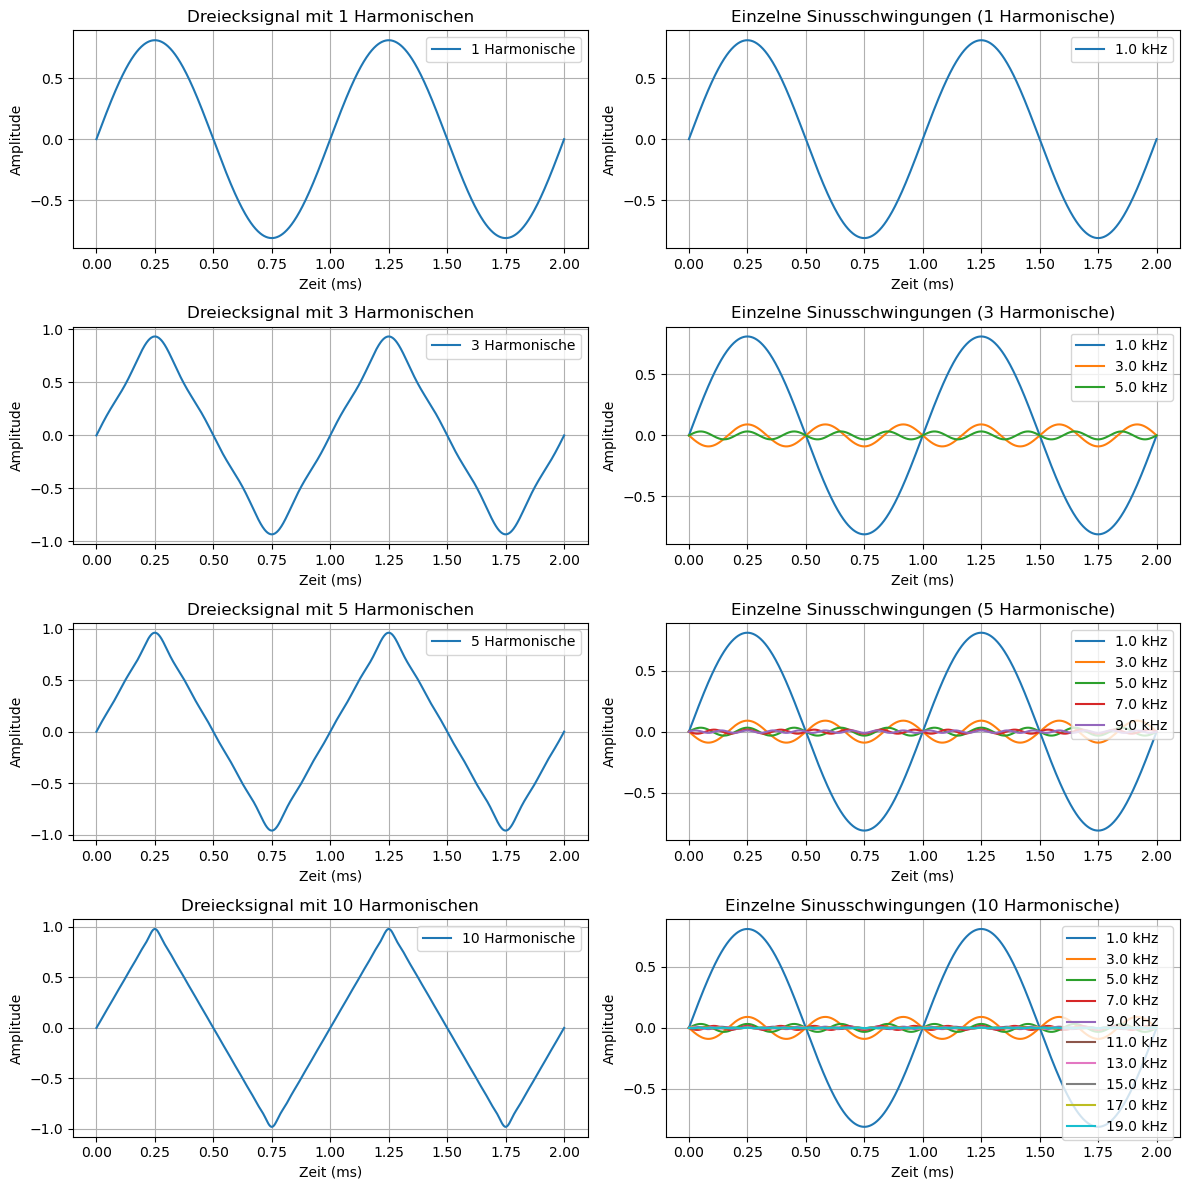

Grundfrequenz: 1000.0 Hz
Nyquist-Frequenz: 5000 Hz
Harmonische: [3000. 5000. 7000.] Hz
Erfüllt das Abtasttheorem? Nein


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter für das Dreiecksignal
T = 1e-3  # Periodendauer in Sekunden
f0 = 1 / T  # Grundfrequenz in Hz
t = np.linspace(0, 2 * T, 1000)  # Zeitvektor für zwei Perioden

# Funktion zur Berechnung des Dreieckssignals mit n Harmonischen
def triangle_wave(t, f0, n_harmonics):
    signal = np.zeros_like(t)
    harmonics_signals = []
    frequencies = []
    for n in range(1, 2 * n_harmonics, 2):  # Nur ungeradzahlige Harmonische
        harmonic_signal = ((-1)**((n-1)/2)) * (8 / (np.pi**2 * n**2)) * np.sin(2 * np.pi * n * f0 * t)
        harmonics_signals.append(harmonic_signal)
        frequencies.append(n * f0)
        signal += harmonic_signal
    return signal, harmonics_signals, frequencies

# Plotten des Dreiecksignals mit unterschiedlichen Anzahlen von Harmonischen
plt.figure(figsize=(12, 12))

n_harmonics_list = [1, 3, 5, 10]  # Anzahlen von Harmonischen

for i, n_harmonics in enumerate(n_harmonics_list):
    signal, harmonics_signals, frequencies = triangle_wave(t, f0, n_harmonics)
    
    # Plotten des zusammengesetzten Dreiecksignals
    plt.subplot(len(n_harmonics_list), 2, 2*i + 1)
    plt.plot(t*1000, signal, label=f'{n_harmonics} Harmonische')
    plt.title(f'Dreiecksignal mit {n_harmonics} Harmonischen')
    plt.xlabel('Zeit (ms)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()
    
    # Plotten der einzelnen Sinusschwingungen
    plt.subplot(len(n_harmonics_list), 2, 2*i + 2)
    for harmonic_signal, freq in zip(harmonics_signals, frequencies):
        plt.plot(t*1000, harmonic_signal, label=f'{freq/1000:.1f} kHz')
    plt.title(f'Einzelne Sinusschwingungen ({n_harmonics} Harmonische)')
    plt.xlabel('Zeit (ms)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

# Überprüfung des Abtasttheorems
harmonics = np.array([3, 5, 7]) * f0  # ungeradzahlige Harmonische
nyquist_freq = 5000  # Beispielwert für Nyquist-Frequenz (Hälfte der Abtastrate)
is_nyquist_met = np.all(harmonics <= nyquist_freq)

print(f"Grundfrequenz: {f0} Hz")
print(f"Nyquist-Frequenz: {nyquist_freq} Hz")
print(f"Harmonische: {harmonics} Hz")
print(f"Erfüllt das Abtasttheorem? {'Ja' if is_nyquist_met else 'Nein'}")


Das Abtasttheorem ist in diesem Falle nicht erfüllt, da eine Nyquist-Frequenz von $\frac{f_s}{2} = 5\,\mathrm{kHz}$ bereits die relevante Oberschwingungen nicht mehr korrekt abtasten kann und somit das Abtasttheorem verletzt. 

2. **Effekte bei Verletzung des Abtasttheorems:**

   * Welcher Effekt tritt ein, wenn das Abtasttheorem verletzt ist?
   * Erläutern Sie diesen Effekt mit einer einfachen Skizze.
   
Wenn das Abtasttheorem verletzt wird, tritt Aliasing auf. Aliasing bedeutet, dass höhere Frequenzen im Signal als niedrigere Frequenzen erscheinen, was zu einer falschen Darstellung des Originalsignals führt.

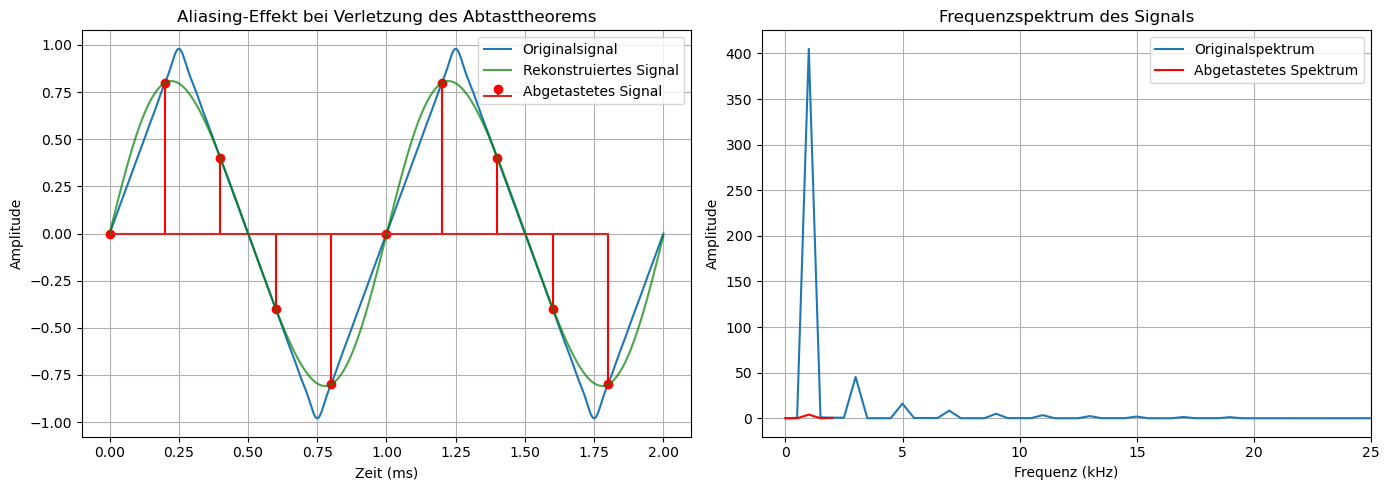

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

# Parameter für das Dreiecksignal
T = 1e-3  # Periodendauer in Sekunden
f0 = 1 / T  # Grundfrequenz in Hz
fs = 5e3  # Abtastrate in Hz (Beispiel: 5 kHz)
nyquist_freq = fs / 2  # Nyquist-Frequenz
t = np.linspace(0, 2 * T, 1000)  # Zeitvektor für zwei Perioden
t_sampled = np.arange(0, 2 * T, 1 / fs)  # Abgetastete Zeitvektor

# Funktion zur Berechnung des Dreieckssignals mit n Harmonischen
def triangle_wave(t, f0, n_harmonics):
    signal = np.zeros_like(t)
    for n in range(1, 2 * n_harmonics, 2):  # Nur ungeradzahlige Harmonische
        harmonic_signal = ((-1)**((n-1)/2)) * (8 / (np.pi**2 * n**2)) * np.sin(2 * np.pi * n * f0 * t)
        signal += harmonic_signal
    return signal

# Berechnung des Dreiecksignals mit mehreren Harmonischen
n_harmonics = 10  # Anzahl der Harmonischen
signal = triangle_wave(t, f0, n_harmonics)
sampled_signal = triangle_wave(t_sampled, f0, n_harmonics)

# Rekonstruktion des Signals aus den abgetasteten Werten
reconstructed_signal = resample(sampled_signal, len(t))

# Berechnung der Fourier-Transformation des Original- und des Abgetasteten Signals
frequencies = np.fft.fftfreq(len(t), t[1] - t[0])
original_spectrum = np.fft.fft(signal)
sampled_frequencies = np.fft.fftfreq(len(t_sampled), t_sampled[1] - t_sampled[0])
sampled_spectrum = np.fft.fft(sampled_signal)

# Plotten des Aliasing-Effekts
plt.figure(figsize=(14, 5))

# Zeitbereich
plt.subplot(1, 2, 1)
plt.plot(t*1000, signal, label='Originalsignal')
plt.stem(t_sampled*1000, sampled_signal, 'r', markerfmt='ro', label='Abgetastetes Signal')
plt.plot(t*1000, reconstructed_signal, 'g', label='Rekonstruiertes Signal', alpha=0.7)
plt.xlabel('Zeit (ms)')
plt.ylabel('Amplitude')
plt.title('Aliasing-Effekt bei Verletzung des Abtasttheorems')
plt.legend()
plt.grid(True)

# Frequenzbereich des Abgetasteten Signals
plt.subplot(1, 2, 2)
plt.plot(frequencies[:len(frequencies)//2]/1000, np.abs(original_spectrum)[:len(frequencies)//2], label='Originalspektrum')
plt.plot(sampled_frequencies[:len(sampled_frequencies)//2]/1000, np.abs(sampled_spectrum)[:len(sampled_frequencies)//2], 'r', label='Abgetastetes Spektrum')
plt.xlabel('Frequenz (kHz)')
plt.xlim([-1, 25])
plt.ylabel('Amplitude')
plt.title('Frequenzspektrum des Signals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

3. **Praktische Anwendung:**

   * Erklären Sie, warum es in der Audiotechnik wichtig ist, die Abtastfrequenz korrekt zu wählen und welche Konsequenzen eine Verletzung des Abtasttheorems haben könnte.
   
In der Audiotechnik ist es entscheidend, die Abtastfrequenz korrekt zu wählen, um eine hohe Klangqualität zu bewahren. Wenn die Abtastfrequenz zu niedrig ist, führt dies zu Aliasing, wodurch die Klangqualität beeinträchtigt wird und unerwünschte Frequenzen im Audiosignal erscheinen. Dies kann zu hörbaren Verzerrungen führen und die musikalische Darbietung negativ beeinflussen.